# Project: Investigate a Dataset - [Medical Appointment No-show ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction
## No-Show Appointment Dataset

### Dataset Description
One issue most hospitals have round the world apart from patients issue is the problem of patients not keeping their appointment with doctors. That is what is reflected in this dataset which contains patients who showed up and didn't show up with several other factors to determine the possible cause of missing their appointments.

#### Column names and meaning (Gotten from Kaggle website)
1. PatientID : Identification of a patient
2. AppointmentID: Identification of each appointment
3. Gender: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
4. AppointmentDay: The day of the actual appointment, when they have to see the doctor
5. ScheduledDay: The day someone called or registered the appointment, this is before appointment of course
6. Age: How old is the patient
7. Neighbourhood: Where the appointment takes place.
8. Scholarship: True or False[1 or 0] (sponsored by the Bolsa Família more info can be gotten here https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
9. Hypertension: True or False [1 or 0]
10. Diabetes: True or False [1 or 0]
11. Alcholism: True or False [1 or 0]
12. Handcap: True or false [1 or 0]
13. SMS_received: 1 or more messages sent to the patient.
14. No_show: No - They showed up for the appointment
             Yes - They didn't show up for the appointment
             
Note: The No-show was later renamed to showed up. The No was replaced with 1 and Yes was replaced with 0

### Descriptive analysis of this dataset
1. Duplicated PatientId
2. Description of number of patients who showed up and didn't
3. Gender that booked an appointment more
4. Description of how the scholarship was shared
5. Description of Neighbourhood where the appointment took place
6. Description on the number of sms received by patients
7. Difference in scheduled day and appointment day

### Research Questions
1. Is age an hindrance to why people didn't show up?
2. Does body factor affect people not showing up for an appointment?
3. Does body factor alongside age affect people not showing up for an appointment?
4. Are neighbourhood where appointment are booked mostly influence patient showing up for an appointment?
5. If the number of people who recieved sms reminder of their appointment showed up more than others
6. To see the effect of waiting day on people who showed up

In [1]:
# this cell contains every module i'd need to explore this data set
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Data Wrangling
This is the section the dataset is loaded, assessed for how clean it is and further analysis that can be done on the dataset

In [2]:
#Loading the dataset
df = pd.read_csv('appointments.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [3]:
#checking the property of the dataset to see if the datatype is accurate and take note of what needs to be adjusted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#this gives a description of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
#to see if there are missing data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
#to see if any row is duplicated
df.duplicated().sum()

0

In [7]:
#To see if the number of unique values in the dataset is consistent with the number in the dataset description 
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

#### Setting Functions to be used
These are the set of functions to be used for plotting charts

In [8]:
#function for histogram using seaborn module
def Histogram(Column_name, Stat, Title = '', xLabel = '', yLabel = '', Hue = 0):
    sns.set()
    fig = plt.figure(figsize =(10, 7))
    p = sns.histplot(data = df, x = Column_name, stat = Stat, bins = 10, hue = Hue)
    plt.title(Title)
    p.set_xlabel(xLabel)
    p.set_ylabel(yLabel)
    plt.show()

In [9]:
#function for Catplot chart using seaborn library
def cat(Column_name, Kind, Hue, Title,xLabel, yLabel, Data):
    sns.set()
    fig = plt.figure(figsize =(10, 7))
    c = sns.catplot(x = Column_name, kind = Kind, hue = Hue, data = Data)
    plt.title(Title)
    c.set_xlabels(xLabel)
    c.set_ylabels(yLabel)
    plt.xticks(rotation=90);

In [10]:
#function for bar graph using seaborn library
def bar(Column_namex, Column_namey, Hue, Title,xLabel, yLabel):
    sns.set()
    fig = plt.figure(figsize =(10, 7))
    sns.barplot(x = Column_namex, y = Column_namey, hue = Hue, data = df)
    plt.title(Title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.show()


### Data Cleaning
The assessed dataset will be cleaned following the below observations

####  Result of Assessment and cleaning to be carried out
- The PatientId is lesser than the appointmentId which means some patient booked an appointment more than once
- The Date has a wrong datatype and will need to be changed to a datetime format
- A new column wil be created to know if distance between the appointment day and scheduled day influenced a patient not showing up 
- The patientId is an object not a float though it might not be relevant in the data exploration
- There are no null or duplicated values present
- The column name 'No-show' is confusing and will need to be changed also the 'Yes for not showing up will be replaced with 0 while the no replaced with 0
- Column names that are misspelled will be corrected
- The Handcap column is inconsistent with the description given by the data creator as it contains digits from 1 to 5 instead of it being a binary digit as the data creator gave it. Also the same is seen in the Sms_received column which has digits between 0 and 1 when it instead should contain digits from 1 and above. So there is enough reason to believe both columns has been interchanged and as such will be renamed
- The numerical data will be checked for outliers
- Columns that needs to be merged based on their relatedness e.g body factors like Hypertension, Diabetes and Alcholism will be merged
- Columns that are not needed will be dropped; The merged columns will be dropped

In [11]:
#to see the dataset
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [12]:
# the format for the scheduledday and appointment day in the dataframe is incorrect so it was changed to the appropraite date format
dates = ['ScheduledDay','AppointmentDay']

for date_s in dates:
    df[date_s] = pd.to_datetime(df[date_s])

In [13]:
#to get the column for days difference
day_diff = df['AppointmentDay'].dt.date - df['ScheduledDay'].dt.date
day_diff = day_diff.dt.days
df.insert(5, 'day_diff', day_diff)

In [14]:
#to check if there are wrongly appointed days
df.query('day_diff < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,day_diff,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,-1,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,-1,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,-1,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,-6,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,-1,7,TABUAZEIRO,0,0,0,0,0,0,Yes


In [15]:
#replacing the dates that were wrongly appointed
df['day_diff'] = df['day_diff'].replace([-1], '0')
df['day_diff'] = df['day_diff'].replace([-6], '0')

In [16]:
#changing the patientid to an object
df['PatientId'] = df['PatientId'].astype(str)

In [17]:
#the columns that seem confusing and wrongly spelt were renamed
df.rename(columns = {'No-show':'Showed_up', 'Hipertension': 'Hypertension','Handcap' : 'SMS_received', 'SMS_received' : 'Handcap'}, inplace = True)

In [18]:
#to prevent further confusion in the changed column name the data ['Yes and No'] had to be replace with a more understandable data
show = ['Showed_up']
for col in show:
    df[col] = df['Showed_up'].replace('No', 1) 
    df[col] = df['Showed_up'].replace('Yes', 0) 

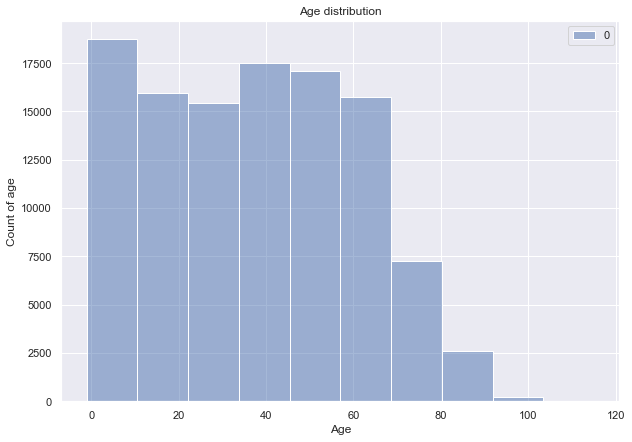

In [19]:
#checking the distribution of age to spot outliers
Histogram('Age', 'count', 'Age distribution', 'Age', 'Count of age')

<AxesSubplot:xlabel='Age'>

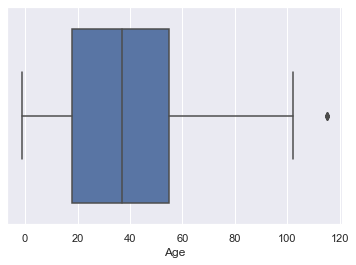

In [20]:
#there was an age below 1 and other ages above 100
sns.boxplot(data = df, x = 'Age')

In [21]:
#the outliers were removed
df.drop(index = (df.loc[ df['Age'] > 100].index) , axis=0, inplace=True)
df.drop(index = (df.loc[ df['Age'] < 0].index) , axis=0, inplace=True)

In [22]:
#the removed values were checked for
df.query('Age > 100')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,day_diff,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,Handcap,Showed_up


In [23]:
#a new column was created for factors that are associated with human body (beaviour and diseases)
df['body_factor'] = df['Hypertension'] + df['Diabetes'] + df['Alcoholism'] + df['Handcap']

In [24]:
#the columns not needed are removed
df.drop(['Hypertension', 'Diabetes', 'Alcoholism', 'Handcap'], axis = 1, inplace = True)

In [25]:
#to see the outcome of the data cleaning
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,day_diff,Age,Neighbourhood,Scholarship,SMS_received,Showed_up,body_factor
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,62,JARDIM DA PENHA,0,0,1,1
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,56,JARDIM DA PENHA,0,0,1,0
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,62,MATA DA PRAIA,0,0,1,0


#### Dataset exploration
This gives a description of the dataset before solving the intended questions derived from the data
- The number of patient who booked an appointment more than once
- The number of patients which showed up were more than those who didn't
- The major gender
- Scholarship distribution among the genders
- Description of Neighbourhood where the appointment took place
- Description on the number of sms received by patients
- Difference in scheduled day and appointment day

In [26]:
#to see the number of column and rows
df.shape

(110519, 12)

#### Duplicated PatientId
Duplicated PatientId is visualized to see the number of patients who booked an appointment more than once. 

In [27]:
#To know the number of patients that booked appointment more than once
duplicate = df.PatientId.duplicated().value_counts()
duplicate

False    62294
True     48225
Name: PatientId, dtype: int64

In [28]:
percent_of_duplicate = duplicate / len(df) *100
percent_of_duplicate

False    56.364969
True     43.635031
Name: PatientId, dtype: float64

<AxesSubplot:title={'center':'Number of patients who booked appointment'}, xlabel='Patients with more than one appointmentID', ylabel='Number of appointments'>

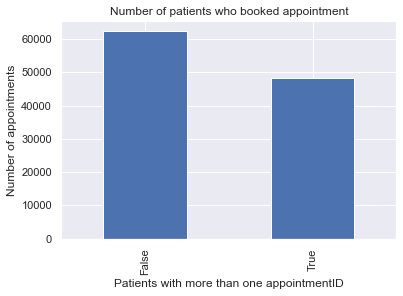

In [29]:
#patientId duplicate graph
duplicate.plot(kind = 'bar', title = 'Number of patients who booked appointment', xlabel = 'Patients with more than one appointmentID', ylabel = 'Number of appointments')

The false represents the original patients while the true represents the patients with multiple appointmentId meaning they booked an appointment more than once

#### Description of number of patients who showed up and didn't
The number of Patients which showed up and didn't was derived from the dataset

In [30]:
#to see the number of patients that showed up and didn't
num_of_show = df["Showed_up"].value_counts()
num_of_show

1    88203
0    22316
Name: Showed_up, dtype: int64

In [31]:
#percentage of patients that showed up and didn't
percent_of_show = df['Showed_up'].value_counts() / len(df) *100

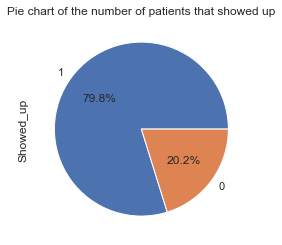

In [32]:
#pie chart representation of patients that showed up and didn't
plot = percent_of_show.plot.pie(title="Pie chart of the number of patients that showed up", autopct='%1.1f%%')

A pie chart gives the result of number of patients that came for the appointment a better and clearer visualization

#### Gender that booked an appointment
To see the number of gender who booked an appointment mostly and to check out whether or not Gender was influential in patients showing up or not

In [33]:
#This shows the number of patients that showed up in relation to the gender 
pd.crosstab(df['Gender'], df['Showed_up'])

Showed_up,0,1
Gender,,
F,14591,57241
M,7725,30962


<Figure size 720x504 with 0 Axes>

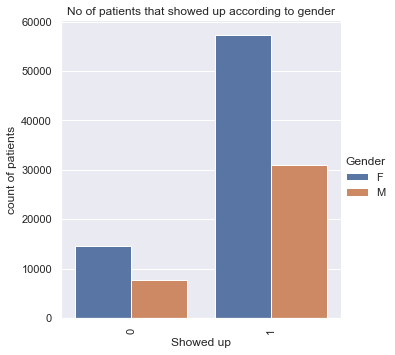

In [34]:
#This shows the number of patients that showed up in relation to the gender in a bar chart representation
cat('Showed_up', 'count', 'Gender', 'No of patients that showed up according to gender', 'Showed up', 'count of patients',df)

The female gender is the gender with the highest number and as such it has the highest number of show up in respect to the male

#### Description of how the scholarship was shared
To show which gender benefitted from the scholarship mostly and also if a scholarship was the reason for a gender being more than the other

In [35]:
df.groupby(['Scholarship'])['Gender'].count()

Scholarship
0    99658
1    10861
Name: Gender, dtype: int64

<Figure size 720x504 with 0 Axes>

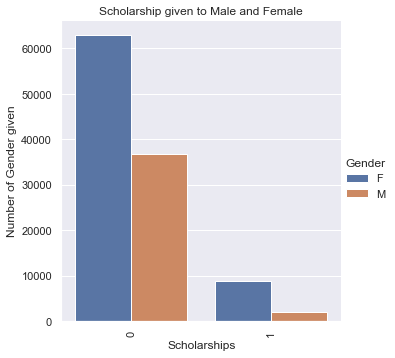

In [36]:
# graph showing who benefitted from the scholarship most
cat('Scholarship', 'count', 'Gender', 'Scholarship given to Male and Female','Scholarships', 'Number of Gender given', df)

The benefactor of the scholarship is small compared to those without scholarship and shouldn't be used as a yardstick for the number of patient who showed up because the impact isn't so much

#### Description of Neighbourhood where the appointment took place
The neighbourhood where the appointments took place was explored to see if the number of appointment booked in those location affected patients showing up for their appointment in comparison to locations which doesn't have much appointments booked at.

In [37]:
#the top 10 neighbourhood patients who booked and appointment came from
top_neighbourhood = df['Neighbourhood'].value_counts().head(10)

In [38]:
#the 10 neighbourhood appointment was booked
top_neighbourhood

JARDIM CAMBURI       7717
MARIA ORTIZ          5804
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
Name: Neighbourhood, dtype: int64

<AxesSubplot:title={'center':'Top neighborhood appointment was booked'}, xlabel='Location', ylabel='Number of appointments'>

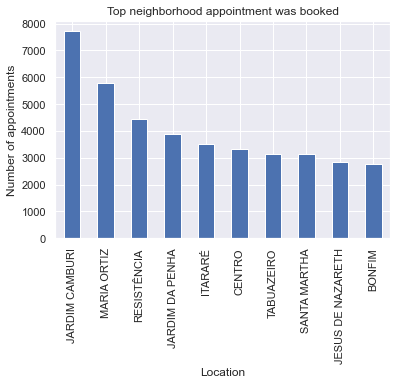

In [39]:
#visual representation of the neighbourhoods
top_neighbourhood.plot(kind = 'bar', title = 'Top neighborhood appointment was booked', xlabel = 'Location', ylabel = 'Number of appointments')

In [40]:
#the least 10 neighbourhood where appointments was booked
least_neighbourhood = df['Neighbourhood'].value_counts().tail(10)
least_neighbourhood

UNIVERSITÁRIO                  152
SEGURANÇA DO LAR               145
NAZARETH                       135
MORADA DE CAMBURI               96
PONTAL DE CAMBURI               69
ILHA DO BOI                     35
ILHA DO FRADE                   10
AEROPORTO                        8
ILHAS OCEÂNICAS DE TRINDADE      2
PARQUE INDUSTRIAL                1
Name: Neighbourhood, dtype: int64

<AxesSubplot:title={'center':'Least neighborhood appointment was booked'}, xlabel='Location', ylabel='Number of appointments'>

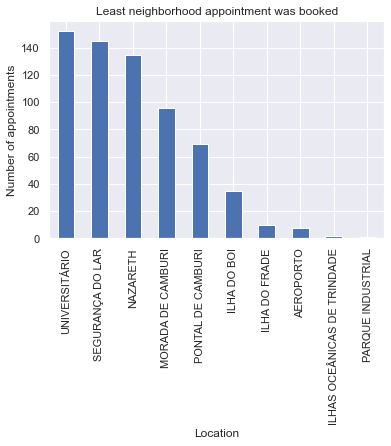

In [41]:
#graph of the least 10 neighbourhoods
least_neighbourhood.plot(kind = 'bar', title = 'Least neighborhood appointment was booked', xlabel = 'Location', ylabel = 'Number of appointments')

The top 10 neighbourhood has a higher number of appointments than the least 10 neighbourhood and it should be a good factor to check for people that showed up 

In [42]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,day_diff,Age,Neighbourhood,Scholarship,SMS_received,Showed_up,body_factor
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,62,JARDIM DA PENHA,0,0,1,1
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,56,JARDIM DA PENHA,0,0,1,0
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,62,MATA DA PRAIA,0,0,1,0


### Description on the number of sms received by patients
This tells the number of times sms was sent to patients as a reminder of their appointment

In [43]:
#the number of sms received by patients
sms = df['SMS_received'].value_counts()
sms

0    108282
1      2038
2       183
3        13
4         3
Name: SMS_received, dtype: int64

In [44]:
#percentage of patients who received sms
percent_of_sms_received = df['SMS_received'].value_counts() / len(df) *100
percent_of_sms_received

0    97.975914
1     1.844027
2     0.165582
3     0.011763
4     0.002714
Name: SMS_received, dtype: float64

<AxesSubplot:title={'center':'Number of Sms received'}>

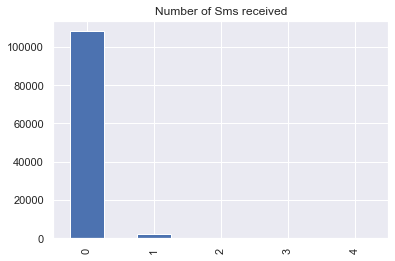

In [45]:
# a bar chart was used for visualization instead of pie chart because of how small the value is
sms.plot( kind = 'bar', title = 'Number of Sms received')

The number of SMS recieved was poor as a larger number of patients didn't recieve a message. This could have an effect on people showing up

### Difference in days of scheduled and appointment
A check to see how the days difference for each appointment if more appointments were booked based on the difference

In [46]:
# number of days differnce according to the difference in the appointment and scheduled day
patients_diff = df.day_diff.value_counts()

<AxesSubplot:title={'center':'Spread of the day differences'}, xlabel='Number of days difference', ylabel='Number of appointment'>

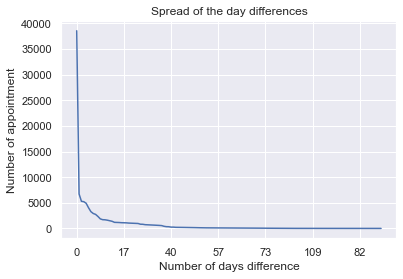

In [47]:
# the number of appointment were more when the days
#inbetween the scheduled and appointment day was less
patients_diff.plot(kind = 'line', title = 'Spread of the day differences', xlabel = 'Number of days difference', ylabel = 'Number of appointment')

The days difference has an effect on people showing up for an appointment

### Answering the questions derived from study of the data

Examining the relationship between independent variables like age, Neighborhood, Sms_received, body factors and the dependent variable no-show patients to see which factor affected patients which didn't show up
1. Is age an hindrance to why people didn't show up?
2. Does body factor affect people not showing up for an appointment?
3. Does body factor alongside age affect people not showing up for an appointment?
4. Are neighbourhood where appointment are booked mostly influence patient showing up for an appointment?
5. If the number of people who recieved sms reminder of their appointment showed up more than others
6. To see the effect of waiting day on people who showed up

### Research Question 1  (Is age an hindrance to why people didn't show up)
The age is arranged into bins to see its distribution alongside the effect it had on patients showing up

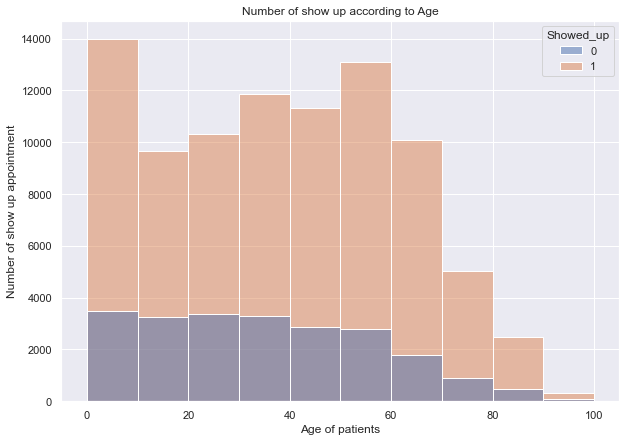

In [48]:
# Age factor to see if age contributed to patients not showing up
Histogram('Age', 'count', 'Number of show up according to Age', 'Age of patients', 'Number of show up appointment', 'Showed_up')

### Research Question 2  (Does body factor affect people not showing up for an appointment)
This body factor comprises of diseases, disability and habits which could influence a patient nor coming from their appointment. 
All these has been merged into a table which tells the number of factor that could be responsible

<Figure size 720x504 with 0 Axes>

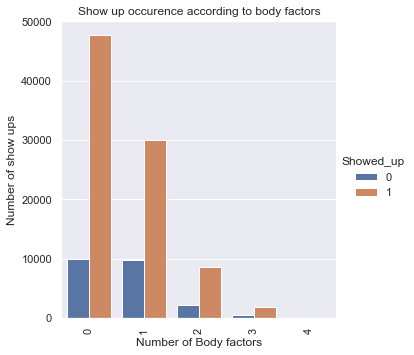

In [49]:
#Body facors was used to see who came for their appointment 
cat('body_factor', 'count', 'Showed_up', 'Show up occurence according to body factors', 'Number of Body factors', 'Number of show ups', df)

### Research Question 3  (Does body factor alongside age affect people not showing up for an appointment)
Since the body factors are real life issues most adult faces it seem like a good idea to match it with age and see who showed up more

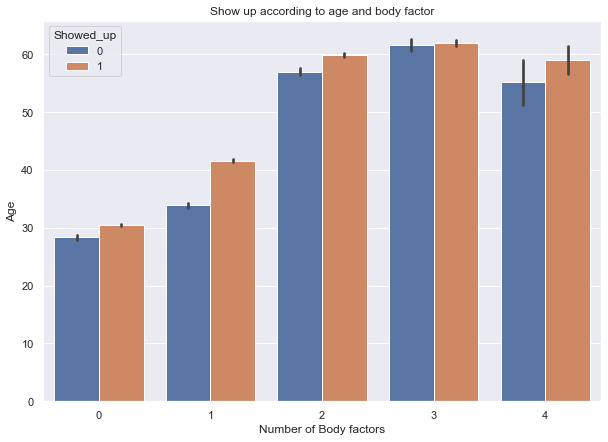

In [50]:
# body factor and age was checked with who showed up 
bar('body_factor', 'Age', 'Showed_up', 'Show up according to age and body factor', 'Number of Body factors', 'Age')

### Research Question 4  (Are neighbourhood where appointment are booked influential patient showing up for an appointment?)
There is a possibility neighborhood where the appointments were booked has an influence with people coming for an appointment

In [51]:
#the top ten neighbourhood where appointment were most booked are selected
top_ten = df.apply(lambda row: row[df['Neighbourhood'].isin(['JARDIM CAMBURI','MARIA ORTIZ','RESISTÊNCIA','JARDIM DA PENHA','ITARARÉ','CENTRO','TABUAZEIRO','SANTA MARTHA','JESUS DE NAZARETH','BONFIM'])])

<Figure size 720x504 with 0 Axes>

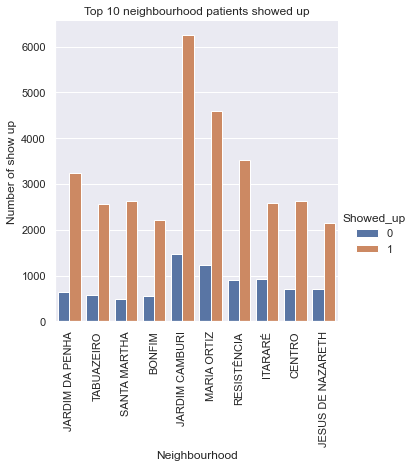

In [52]:
# a graph is plotted to see the relationship of the top ten neighbourhood with patients that showed up
cat('Neighbourhood', 'count', 'Showed_up', 'Top 10 neighbourhood patients showed up', 'Neighbourhood', 'Number of show up', top_ten)

In [53]:
#the least ten neighbourhood where appointment were most booked are selected
least_ten = df.apply(lambda row: row[df['Neighbourhood'].isin(['UNIVERSITÁRIO','SEGURANÇA DO LAR','NAZARETH','MORADA DE CAMBURI','PONTAL DE CAMBURI','ILHA DO BOI','ILHA DO FRADE','AEROPORTO','ILHAS OCEÂNICAS DE TRINDADE','PARQUE INDUSTRIAL'])])

<Figure size 720x504 with 0 Axes>

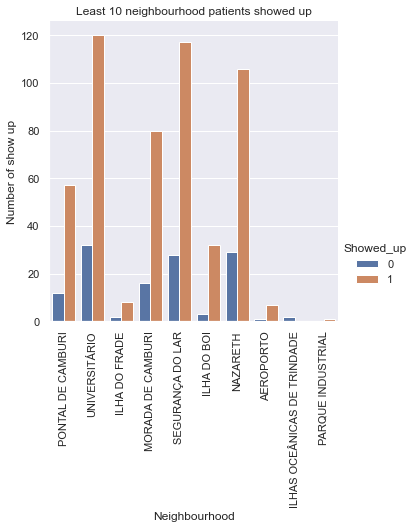

In [54]:
# a graph is plotted to see the relationship of the least ten neighbourhood with patients that showed up
cat('Neighbourhood', 'count', 'Showed_up', 'Least 10 neighbourhood patients showed up', 'Neighbourhood', 'Number of show up', least_ten)

### Research Question 5 (If the number of people who recieved sms reminder of their appointment showed up more than others)
Could a SMS Reminder be more effective in people showing up for their appointment

<Figure size 720x504 with 0 Axes>

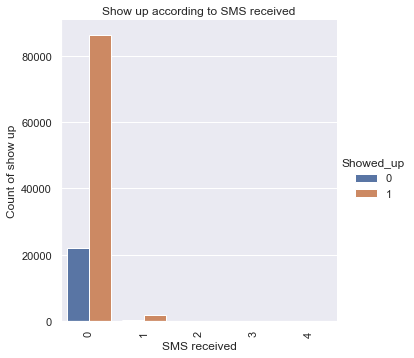

In [55]:
#to see if people who recieved sms showed up more than others who didn't
cat('SMS_received','count','Showed_up', 'Show up according to SMS received', 'SMS received', 'Count of show up', df)

# Conclusions
<p>
The result of the analysis brought out these findings.
Lots of patients booked an appointment more than once and this could be as a reult of factors like missing their appointment day, need to visit the hospital again after the first visit. The margin between New Patients and Old patients was little. 
The percentage of the Original patient to the duplicated paitent is 56.3% to 43.6%

It was observed during the analysis that female patients were more than the male so on further investigation it was seen that female benefitted more from the scholarship given by the Bolsa Familia than male. But generally, it was noticed there was not much recepient of the scholarship from both genders therefore, it can't be used as a factor as to why patients didn't show up since a larger number of patients were without scholarship.

The number of sms recieved was lot; a greater number of patients didn't receive a message from the hospital and they still showed up. Observing the patients who recieved sms for example the people who received 4 messages out of 3 patients 2 showed up for the appointment. I think if sms had been received it would have improve the number of patients that showed up.

The patients who had lesser days difference between scheduled day and appointment day booked an appointment more than people with longer days. If the hospitals can reduce the number of days between scheduling an appointment and the actual day of the appointment it will improve the chances of people showing up for their appointment.

The age range which showed up most for their appointment was between 1-10 which are children. This shows adult would rather bring children to an hospital appointment than them showing up for theirs.

The patients with no body factors like diseases, disabilities and habits showed up for their appointment than people with those issues.

The age range that had those body factors and showed up were mostly older people from 40 years above. They also had 2 or more body factor challenges.

JARDIM CAMBURI had the most number of show ups (at 7717) among the top ten neighbourhood where an appointment was booked. While UNIVERSITÁRIO,SEGURANÇA DO LAR,NAZARETH had the most number of show ups in the least ten booked neighbourhood. The margin between the top ten and least ten is very wide but according to the visualization people tend to show up more in the least booked neighbourhood in relation to their number.
    
This is not a conclusive result as the result is subject to change based on additional information that could be provided. Also no statistical test was done on this analysis.
    </p>
    
**Limitations on Dataset**
1. Lack of information on why patientid had duplicate values: As pointed out earlier the actual cause is unknown
2. Shedding of more light on why the scholarship favoured a gender more than the other.
3. If the sms recieved had been distributed evenly more insight would have been drawn on how it affects show up
4. The lack of information on the neighbourhood the patients live to know if patients in the same neighbourhood as the hospital will show up better than others outside of the neighbourhood.

I had the aid of several websites on Google to finally complete thsi project
Websites like Geek for Geek helped me in solving bugs and I also used Kaggle to check the description of the dataset